## 项目目的：可视化QQ空间留言板数据！(主要包括发布次数/发布时间/词云)

In [1]:
import pandas as pd
import numpy as np
qq_dream=pd.read_csv("C:/Users/1/Desktop/970698623liuyan.csv",encoding='gb18030')

import time
qq_dream['time']=pd.to_datetime(qq_dream['time'])
qq_dream['year']=qq_dream['time'].dt.year
qq_dream['hour']=qq_dream['time'].dt.hour
qq_dream['day']=qq_dream['time'].dt.date

import seaborn as sns
import matplotlib.pyplot as plt
#我近几年的写文情况
qq_dream1=qq_dream[qq_dream.name=='万圣节的蛇']


temp = qq_dream1.groupby('year',as_index=False).count()
temp = temp.loc[:,['year','content']]

In [7]:
qq_dream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 5 columns):
floor      503 non-null object
QQ         460 non-null float64
name       503 non-null object
time       503 non-null object
content    499 non-null object
dtypes: float64(1), object(4)
memory usage: 19.8+ KB


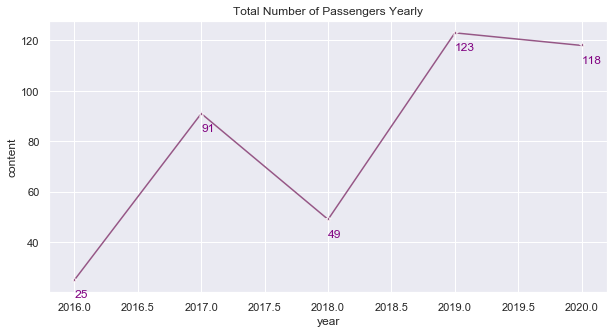

In [3]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='year', y='content', data=temp, marker='*', color='#965786')

ax.set(title='Total Number of Passengers Yearly')# label points on the plot
for x, y in zip(temp['year'], temp['content']):
    plt.text(x = x, y = y-7,s = '{:.0f}'.format(y),color = 'purple')


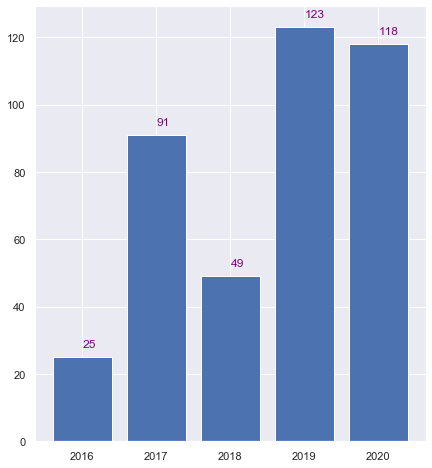

In [4]:
f, ax = plt.subplots(figsize=(7,8))
plt.bar('year', height= 'content',data=temp)
# for i, v in enumerate(y):
#     plt.text(xlocs[i] - 0.25, v + 0.01, str(v))
    
for x, y in zip(temp['year'], temp['content']):
    plt.text(x = x, y = y+3,s = '{:.0f}'.format(y),color = 'purple')

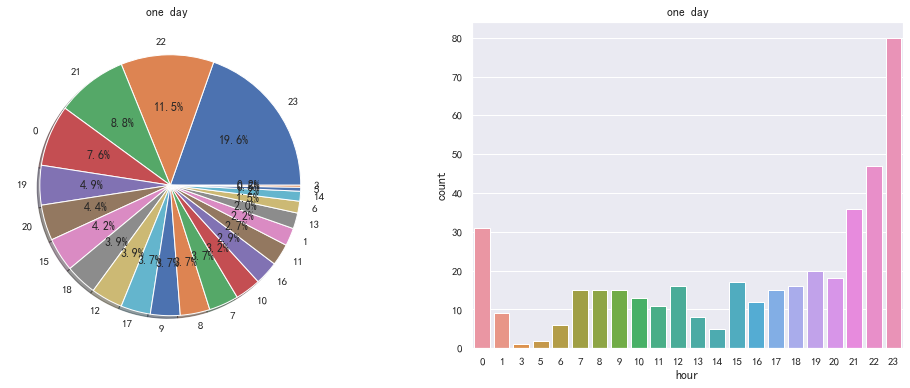

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
f,ax=plt.subplots(1,2,figsize=(17,6))
qq_dream1['hour'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('one day ')
ax[0].set_ylabel('')
sns.countplot('hour',data=qq_dream1,ax=ax[1]) 
ax[1].set_title('one day')      
plt.show()

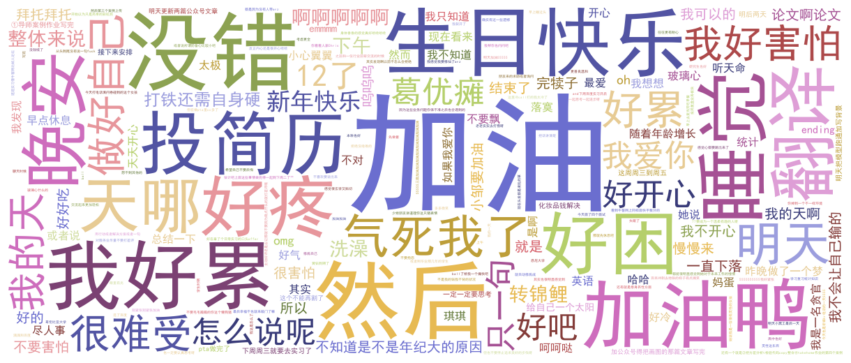

In [6]:
import pandas as pd
import numpy as np
qq_dream=pd.read_csv("C:/Users/1/Desktop/970698623liuyan.csv",encoding='gb18030')

from collections import Counter
data1=qq_dream["content"].dropna().astype(str)
title_words = list(data1.apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
#Counter(title_words).most_common(25)


import wordcloud
import matplotlib.pyplot as plt
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(font_path='./fonts/simhei.ttf',width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")
